In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Theory of Bézier Curves

A Bézier curve is a parametric curve frequently used in computer graphics and related fields. The curve is defined by a set of control points. The polynomial degree of the Bézier curve is determined by the number of control points. For example, a Bézier curve defined by two control points is linear, by three control points is quadratic, and by four control points is cubic.

The mathematical definition of a Bézier curve of degree \( n \) is:

$$
B(t) = \sum_{i=0}^{n} \binom{n}{i} (1 - t)^{n - i} t^i P_i \quad \text{for } 0 \leq t \leq 1
$$

where:
- $$ P_i $$ are the control points,
- $$  \binom{n}{i} $$ is the binomial coefficient, which can be computed as $$ binom{n}{i} = \frac{n!}{i!(n - i)!} $$,
- $$ t $$ is the parameter which varies between 0 and 1.

## Linear Bézier Curve

A linear Bézier curve is simply a straight line between two control points \( P_0 \) and \( P_1 \):

$$
B(t) = (1 - t)P_0 + tP_1
$$

## Quadratic Bézier Curve

A quadratic Bézier curve is defined by three control points \( P_0 \), \( P_1 \), and \( P_2 \):

$$
B(t) = (1 - t)^2 P_0 + 2(1 - t)tP_1 + t^2 P_2
$$

## Cubic Bézier Curve

A cubic Bézier curve is defined by four control points \( P_0 \), \( P_1 \), \( P_2 \), and \( P_3 \):

$$
B(t) = (1 - t)^3 P_0 + 3(1 - t)^2 tP_1 + 3(1 - t)t^2 P_2 + t^3 P_3
$$


In [4]:
cp = np.array([[2,12,10],
              [6,8,2]])
cp

array([[ 2, 12, 10],
       [ 6,  8,  2]])

In [12]:
def fact(n: int) -> int:
    """
    Calculate the factorial of a non-negative integer.

    The factorial of a non-negative integer n is the product of all positive integers less than or equal to n.
    It is defined as:
    - 0! = 1
    - n! = n * (n-1) * ... * 2 * 1 for n > 0

    Parameters
    ----------
    n : int
        A non-negative integer whose factorial is to be computed.

    Returns
    -------
    int
        The factorial of the given number n.

    Raises
    ------
    ValueError
        If n is negative.

    Examples
    --------
    >>> fact(5)
    120

    >>> fact(0)
    1
    """
    if n < 0:
        raise ValueError("Factorial is not defined for negative numbers.")
    
    f = 1
    if n == 0:
        return 1
    else:
        for i in range(1, n + 1):
            f *= i
    return f


In [7]:
class BezierCurve:
    """
    A class to represent a Bezier curve.

    Attributes
    ----------
    t : np.ndarray
        Array of time parameter values for the curve.
    x_y : np.ndarray
        Array of control points for the Bezier curve.
    curve : np.ndarray
        Array of generated points on the Bezier curve.

    Methods
    -------
    generate_curve(x_y: np.ndarray) -> np.ndarray
        Generates the Bezier curve using the control points.
        
    plot_bezier_curve()
        Plots the Bezier curve along with its control points.
    """
    
    def __init__(self):
        """
        Initializes the BezierCurve with default parameters.
        """
        self.t = np.linspace(0, 1, 50).reshape(1, 50)
        self.x_y = None
        self.curve = None

    def generate_curve(self, x_y: np.ndarray) -> np.ndarray:
        """
        Generates the Bezier curve using the provided control points.

        Parameters
        ----------
        x_y : np.ndarray
            An array of shape (2, n) where n is the number of control points. Each column represents a control point in 2D space.

        Returns
        -------
        np.ndarray
            An array of shape (2, 50) representing the points on the Bezier curve.
        """
        self.x_y = x_y
        n = x_y.shape[1] - 1  # Degree of the Bezier curve
        curve_points = np.zeros((2, 50), dtype=float)

        # Calculating Bezier curve points
        for i in range(n + 1):
            s = (fact(n) / (fact(i) * fact(n - i))) * ((1 - self.t) ** (n - i)) * (self.t ** i)
            curve_points += self.x_y[:, [i]] * s

        self.curve = curve_points
        return self.curve

    def plot_bezier_curve(self):
        """
        Plots the Bezier curve and its control points.

        Raises
        ------
        ValueError
            If the curve or control points are not defined.
        """
        if self.curve is None or self.x_y is None:
            raise ValueError("Curve or control points are not defined.")

        plt.plot(self.curve[0], self.curve[1], label='Bezier Curve')
        plt.plot(self.x_y[0], self.x_y[1], 'ro--', label='Control Points')
        plt.scatter(self.x_y[0], self.x_y[1], color='red')
        plt.xticks(np.arange(0, self.x_y.max() + 1, 1))
        plt.yticks(np.arange(0, self.x_y.max() + 1, 1))
        plt.legend()
        plt.xlabel('x')
        plt.ylabel('y')
        plt.title('Bezier Curve')
        plt.grid(True)
        plt.show()

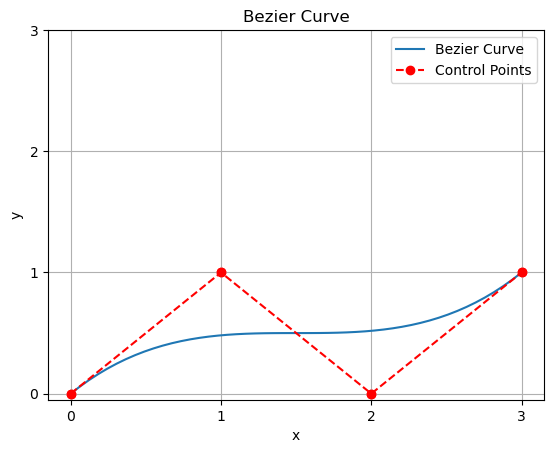

In [8]:
control_points = np.array([[0, 1, 2, 3], [0, 1, 0, 1]])  # Example control points
bezier = BezierCurve()
curve = bezier.generate_curve(control_points)
bezier.plot_bezier_curve()

In [10]:
c = BezierCurve()
c.generate_curve(cp)

array([[ 2.        ,  2.40316535,  2.79633486,  3.17950854,  3.55268638,
         3.91586839,  4.26905456,  4.6122449 ,  4.9454394 ,  5.26863807,
         5.5818409 ,  5.8850479 ,  6.17825906,  6.46147439,  6.73469388,
         6.99791753,  7.25114536,  7.49437734,  7.72761349,  7.95085381,
         8.16409829,  8.36734694,  8.56059975,  8.74385673,  8.91711787,
         9.08038317,  9.23365264,  9.37692628,  9.51020408,  9.63348605,
         9.74677218,  9.85006247,  9.94335693, 10.02665556, 10.09995835,
        10.16326531, 10.21657643, 10.25989171, 10.29321116, 10.31653478,
        10.32986256, 10.3331945 , 10.32653061, 10.30987089, 10.28321533,
        10.24656393, 10.1999167 , 10.14327364, 10.07663474, 10.        ],
       [ 6.        ,  6.07830071,  6.14993753,  6.21491045,  6.27321949,
         6.32486464,  6.3698459 ,  6.40816327,  6.43981674,  6.46480633,
         6.48313203,  6.49479384,  6.49979175,  6.49812578,  6.48979592,
         6.47480217,  6.45314452,  6.42482299,  6.

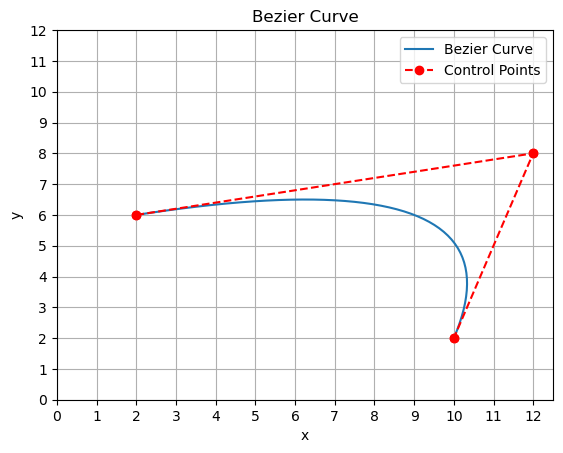

In [11]:
c.plot_bezier_curve()